In [1]:
import os
os.chdir('../../../stylegan2-ada-pytorch')

In [2]:
import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from IPython.utils import io
import PIL.Image
from tqdm import tqdm
from glob import glob

# # Imports for the projection function
# import dnnlib
# import legacy
# from time import perf_counter
# from projector import project

### Load Model

In [3]:
if torch.cuda.is_available():
    DEVICE = 'cuda'
# elif torch.backends.mps.is_available():
#     DEVICE = 'mps'
else:
    DEVICE = 'cpu'

print(f"Using {DEVICE} as device")

Using cpu as device


/pfs/work7/workspace/scratch/tu_zxmav84-thesis/miniconda3/envs/thesis/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
# Load model architecture
model_path = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync/Models/Stylegan2_Ada/Experiments/00004-conditional_stylegan2_ada_images-cond-mirror-auto2-kimg1000/network-snapshot-000920.pkl"

with open(model_path, 'rb') as f:
    architecture = pickle.load(f)
    G = architecture['G_ema'].to(DEVICE)  # torch.nn.Module 
    D = architecture['D'].to(DEVICE)

In [5]:
class2id = {
    'Day dress': 0,
    'Jumper dress': 1,
    'Jersey dress': 2,
    'Cocktail dress / Party dress': 3,
    'Maxi dress': 4,
    'Occasion wear': 5,
    'Shift dress': 6,
    'Denim dress': 7
 }

id2class = {v:k for k,v in class2id.items()}

def make_class_vector(class_name):
    x = torch.zeros(8).reshape(1,-1)
    x[:,class2id[class_name]] = 1
    return x

### Create some samples

8it [00:29,  3.73s/it]


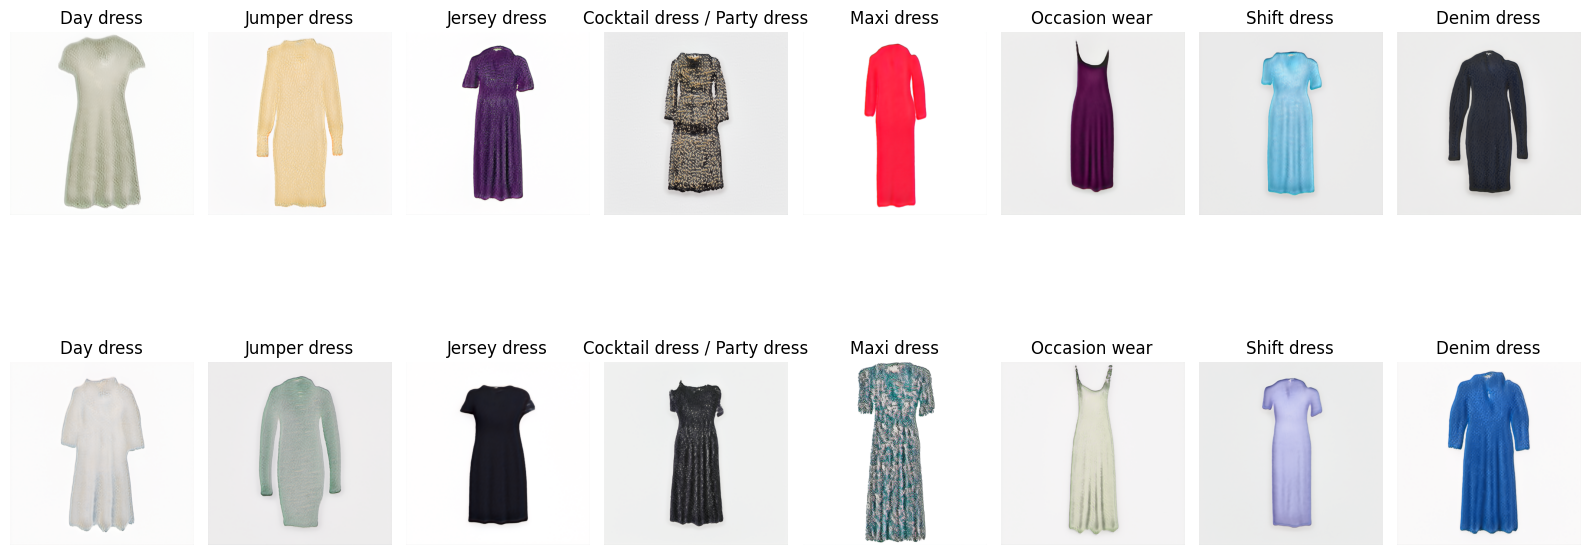

In [6]:
num_samples = 2

fig, ax = plt.subplots(num_samples, len(class2id.keys()), figsize = (len(class2id.keys())*2, num_samples*4))
for col, class_name in tqdm(enumerate(class2id.keys())):
    for i in range(num_samples):
        z = torch.randn([1, G.z_dim]).to(DEVICE)    # latent codes
        c = make_class_vector(class_name)              
        img = G(z, c,  force_fp32=True) 

        img_perm = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
        ax[i, col].imshow(PIL.Image.fromarray(img_perm[0].cpu().numpy(), 'RGB'))
        ax[i, col].axis('off')
        ax[i, col].set_title(class_name)
fig.tight_layout()
plt.show()